<a href="https://colab.research.google.com/github/Math-Muniz/Codenation/blob/main/Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Codenation**

#**Condenation Data Analyst Case - Enem**

[Matheus Muniz](https://www.linkedin.com/in/math-muniz/) - 09/2022

### Você pode consultar mais sobre o meu [github.](https://github.com/Math-Muniz)

### Você pode consultar mais sobre a Codenation neste [link](https://www.codenation.dev/).

### O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv que iremos baixar diretamente do github). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016.](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip)

### Nosso objetivo é no arquivo train.csv criar um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

### Depois teremos que salvar a resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

## **Imports**


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

# **Analise dos Datasets Train e Test**

Vamos importar nosso Dataset e vamos dar uma olhada melhor nele, vamos também dar uma pequena olhada no nosso dataset de test para ver as variáveis contidas nele.

In [36]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Math-Muniz/Codenation/main/train.csv", sep="," , encoding="UTF8")
df_test = pd.read_csv("https://raw.githubusercontent.com/Math-Muniz/Codenation/main/test.csv", sep="," , encoding="UTF8")

In [37]:
print('Analise do tamanho do nosso dataset de teste que contém', df_test.shape[0],'linhas e', df_test.shape[1], 'colunas.')
print('Analise do tamanho do nosso dataset de treino que contém', df_train.shape[0], 'linhas e', df_train.shape[1], 'colunas.')

Analise do tamanho do nosso dataset de teste que contém 4576 linhas e 47 colunas.
Analise do tamanho do nosso dataset de treino que contém 13730 linhas e 167 colunas.


Aqui nós podemos ver que temos colunas e linhas no nosso dataset de treino que não vamos ter na nossa base de test, vamos analisar quais colunas temos na nossa base de test agora para termos ideia de algumas colunas que podemos usar mais a frente.

In [38]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

Checando mais informações sobre o arquivo train.csv que importamos


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


Selecionando as primeiras Colunas Numéricas

In [40]:
df_train.select_dtypes(include='number').head()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
0,1,2016,4314902,43,24,0.0,1,1,4314902.0,43.0,...,0.0,0.0,5,5,0,5,5,5,5,5.0
1,2,2016,2304707,23,17,0.0,3,1,2304707.0,23.0,...,NaN,NaN,5,5,1,1,1,1,1,NaN
2,3,2016,2304400,23,21,0.0,3,1,2304400.0,23.0,...,NaN,NaN,5,5,5,5,5,5,5,NaN
3,4,2016,3304557,33,25,0.0,0,1,3304557.0,33.0,...,5.0,5.0,5,5,5,5,2,5,5,5.0
4,5,2016,1302603,13,28,0.0,2,1,1505304.0,15.0,...,5.0,4.0,5,5,4,3,1,4,5,NaN


Separando as colunas somente com valores inteiros


In [41]:
df_train.select_dtypes(include=['int'])

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,TP_PRESENCA_MT,TP_LINGUA,Q005,Q034,Q035,Q036,Q037,Q038,Q039,Q040
0,1,2016,4314902,43,24,1,1,1,4,1,...,1,1,3,5,5,0,5,5,5,5
1,2,2016,2304707,23,17,3,1,2,0,2,...,1,1,5,5,5,1,1,1,1,1
2,3,2016,2304400,23,21,3,1,3,0,1,...,0,1,4,5,5,5,5,5,5,5
3,4,2016,3304557,33,25,0,1,1,9,1,...,0,0,4,5,5,5,5,2,5,5
4,5,2016,1302603,13,28,2,1,1,4,1,...,0,1,4,5,5,4,3,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,2016,3502903,35,20,1,1,1,3,1,...,1,0,4,5,5,5,5,5,5,5
13726,4583,2016,2613800,26,33,3,2,1,10,1,...,1,1,3,5,5,5,5,5,5,5
13727,4584,2016,4322186,43,15,1,1,3,0,1,...,1,0,3,5,3,2,2,2,2,2
13728,4585,2016,3303203,33,36,3,1,4,0,1,...,1,1,2,5,5,2,5,5,3,5


Separando as Colunas somente com valores flutuantes

In [42]:
df_train.select_dtypes(include=['float'])

,TP_ESTADO_CIVIL,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ENSINO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q029,Q030,Q031,Q032,Q033,Q041
0,0.0,4314902.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,80.0,80.0,520.0,5.0,5.0,1.0,0.0,0.0,5.0
1,0.0,2304707.0,23.0,1.0,23005157.0,2304707.0,23.0,2.0,1.0,1.0,...,120.0,120.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2304400.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3304557.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,0.0,5.0,5.0,5.0,5.0
4,0.0,1505304.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,4.0,3.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0.0,3552205.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,80.0,40.0,440.0,5.0,5.0,5.0,5.0,5.0,NaN
13726,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,120.0,80.0,560.0,4.0,4.0,5.0,5.0,4.0,NaN
13727,0.0,4303202.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,120.0,120.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN
13728,1.0,3304557.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,80.0,100.0,460.0,5.0,5.0,5.0,5.0,5.0,5.0


Selecionando as Colunas de Objeto

In [43]:
df_train.select_dtypes(include='object')

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,...,Q028,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,Porto Alegre,RS,M,Porto Alegre,RS,NaN,NaN,NaN,NaN,...,E,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,Granja,CE,F,Granja,CE,Granja,CE,NaN,NaN,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,Fortaleza,CE,F,Fortaleza,CE,NaN,NaN,NaN,NaN,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,Rio de Janeiro,RJ,F,Rio de Janeiro,RJ,NaN,NaN,NaN,NaN,...,C,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,Manaus,AM,M,Oriximiná,PA,NaN,NaN,NaN,NaN,...,D,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,Araçoiaba da Serra,SP,M,Sorocaba,SP,NaN,NaN,NaN,NaN,...,A,A,A,A,A,A,A,A,A,A
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,São Vicente Ferrer,PE,F,NaN,NaN,NaN,NaN,NaN,NaN,...,A,A,A,B,B,A,A,A,A,A
13727,5354503700ecf2388f68990435390b6e1ad454ee,Tupanci do Sul,RS,F,Cacique Doble,RS,NaN,NaN,NaN,NaN,...,NaN,A,A,A,A,C,A,A,A,A
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,Nilópolis,RJ,M,Rio de Janeiro,RJ,NaN,NaN,INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...,RJ,...,E,A,A,A,A,D,A,A,A,D


Verificamos se exite algum dado duplicado pelo NU_INSCRICAO

In [44]:
df_train[df_train.duplicated(['NU_INSCRICAO'], keep=False)]

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050


# **Analisando a nossa variável 'NU_NOTA_MT'**

Agora vamos analisar um pouco da nossa variável 'NU_NOTA_MT' para saber mais dela nos iremos usar algumas funções do python além de usar o nosso maravilhoso @searborn para nos dar uma ajuda também.

Primeiro vamos começar com o nosso maravilhoso .describe() que é uma das funções que mais uso pois diz muito sobre a variável.

In [45]:
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

Fiquei feliz em ver que o Min está em 0, o que podia acontecer era termos alguns números negativos para tratarmos depois, mas nesse caso não temos e olha me surpreendi vendo que o Max foi 952 em vez de 1000, parece que ninguém conseguiu acertar todas as questões, vamos então continuar a analisar, agora vamos para o nosso Histograma para ver o que ele nos diz.

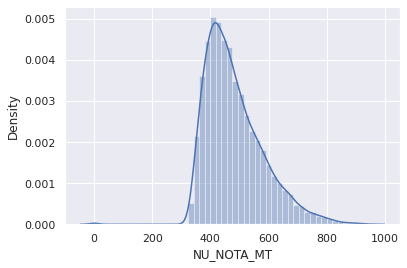

In [46]:
sns.distplot(df_train['NU_NOTA_MT'])

Com esse Histograma podemos analisar que os nossos dados tem: 

* <b>Desvio da distribuição normal.</b>
* <b>Tem assimetria positiva apreciável.</b>
* <b>Mostra picos.</b>

*Isso está ficando interessante então vamos continuar nossa Análise!*

In [47]:
print("Skewness: %f" % df_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % df_train['NU_NOTA_MT'].kurt())

Skewness: 0.920690
Kurtosis: 1.422503


**Skewness e Kurtosis**

Um **valor positivo de Skewness (Assimetria)** implica uma inclinação para a direita. A cauda direita do gráfico de densidade de probabilidade é mais longa que a esquerda e podemos ver se o **valor de Skewness** estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados estão moderadamente distorcidos.

Um **valor positivo de Kurtosis** significa que seu conjunto de dados é **mais "pesado no pico"** (pontiagudo) do que a distribuição normal;
Consideramos distribuições com Kurtosis **maior que 1** muito pontiagudo.

# **Analise Multivariada**

Neste Capítulo iremos procurar as variáveis que tem mais correlação com nossa variável 'NU_NOTA_MT' que é o nosso alvo, com isso já começaremos a separar as variáveis para o nosso modelo de Machine Learning, mais ainda temos que analisar para vermos se temos alguma variável para tratarmos mais adiante. É sempre bom ao tentar fazer essa analise sempre deixarmos aberto o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip) por que ele vai nos guiar para descobrirmos mais o que cada variável significa, sem ele a gente ia ficar completamente perdido.



## **Correlação**

Vamos começar então procurando as 10 variáveis com mais correlação com o nosso alvo 'NU_NOTA_MT' (Nossa variável está inclusa nessa pesquisa por isso o k=11), esse capítulo vai conter alguns gráficos do maravilhoso @seaborn para ficar melhor a visualização dos nossos dados.

In [48]:
corrmat=df_train.corr()
k = 11
cols = corrmat.nlargest(k, 'NU_NOTA_MT')['NU_NOTA_MT'].index
print('Essas sãos as 11 colunas com mais correlação com nossa variável NU_NOTA_MT (está contando com nossa variável): ', cols)

Essas sãos as 11 colunas com mais correlação com nossa variável NU_NOTA_MT (está contando com nossa variável):  Index(['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'],
      dtype='object')


Vamos analisar agora a correlação das nossas variáveis para facilitarmos ainda mais a nossa visão faremos depois um heatmap no nosso maravilhoso @seaborn, o heatmap para mim é um dos gráficos que mais utilizo e mais gosto.

In [49]:
var = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']
df_train[var].corr()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1
NU_NOTA_MT,1.000000,0.584941,0.529594,0.494695,0.379376,0.373233,0.350307,0.343337,0.342282,0.335638,0.299402
NU_NOTA_CN,0.584941,1.000000,0.609543,0.545667,0.459938,0.393774,0.429447,0.416349,0.407747,0.412894,0.357672
NU_NOTA_CH,0.529594,0.609543,1.000000,0.692988,0.550582,0.338486,0.510452,0.494798,0.488797,0.488050,0.443809
NU_NOTA_LC,0.494695,0.545667,0.692988,1.000000,0.512908,0.299387,0.475390,0.441696,0.467356,0.453262,0.430603
NU_NOTA_REDACAO,0.379376,0.459938,0.550582,0.512908,1.000000,0.297040,0.925813,0.816248,0.914505,0.918278,0.862744
TP_DEPENDENCIA_ADM_ESC,0.373233,0.393774,0.338486,0.299387,0.297040,1.000000,0.282997,0.252388,0.264291,0.282586,0.233368
NU_NOTA_COMP3,0.350307,0.429447,0.510452,0.475390,0.925813,0.282997,1.000000,0.664350,0.827151,0.875447,0.759452
NU_NOTA_COMP5,0.343337,0.416349,0.494798,0.441696,0.816248,0.252388,0.664350,1.000000,0.635018,0.655915,0.558587
NU_NOTA_COMP4,0.342282,0.407747,0.488797,0.467356,0.914505,0.264291,0.827151,0.635018,1.000000,0.808006,0.824538
NU_NOTA_COMP2,0.335638,0.412894,0.488050,0.453262,0.918278,0.282586,0.875447,0.655915,0.808006,1.000000,0.756664


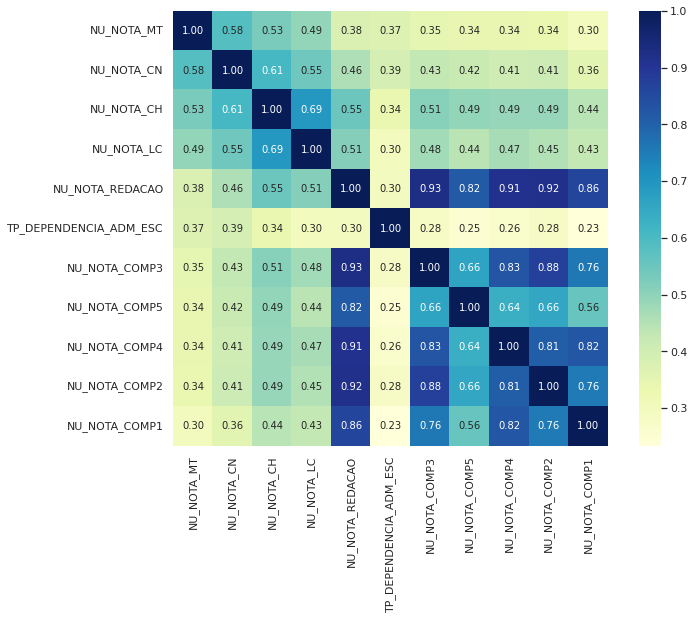

In [50]:
corr = df_train[var].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr, cbar=True, annot=True,  cmap='YlGnBu', square=True, fmt='.2f', annot_kws={'size': 10})

Vamos agora com nosso [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip) saber o que cada variável significa para a gente.

1. NU_NOTA_CN - Nota da prova de Ciências da Natureza

2. NU_NOTA_CH - Nota da prova de Ciências Humanas

3. NU_NOTA_LC - Nota da prova de Linguagens e Códigos

4. NU_NOTA_REDACAO - Nota da prova de redação

5. TP_DEPENDENCIA_ADM_ESC - Dependência administrativa (Escola) (Dividos em 1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada.

6. NU_NOTA_COMP1 - Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.

7. NU_NOTA_COMP2 - Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.

8. NU_NOTA_COMP3 - Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.

9. NU_NOTA_COMP4 - Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

10. NU_NOTA_COMP5 - Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.

Parece que as variáveis que tem mais correlação com nossa variável 'NU_NOTA_MT' são as variáveis de outras notas de provas ou até das competências da nossa prova de redação, vamos dar uma olhada em alguns Scatter Plots para uma melhor analise.

## **Scatter plots entre 'SalePrice' e as variáveis ​​correlacionadas**

Prepare-se para o que você está prestes a ver. Devo confessar que a primeira vez que vi esses gráficos de dispersão fiquei totalmente deslumbrado! Mais uma vez, obrigado @seaborn!

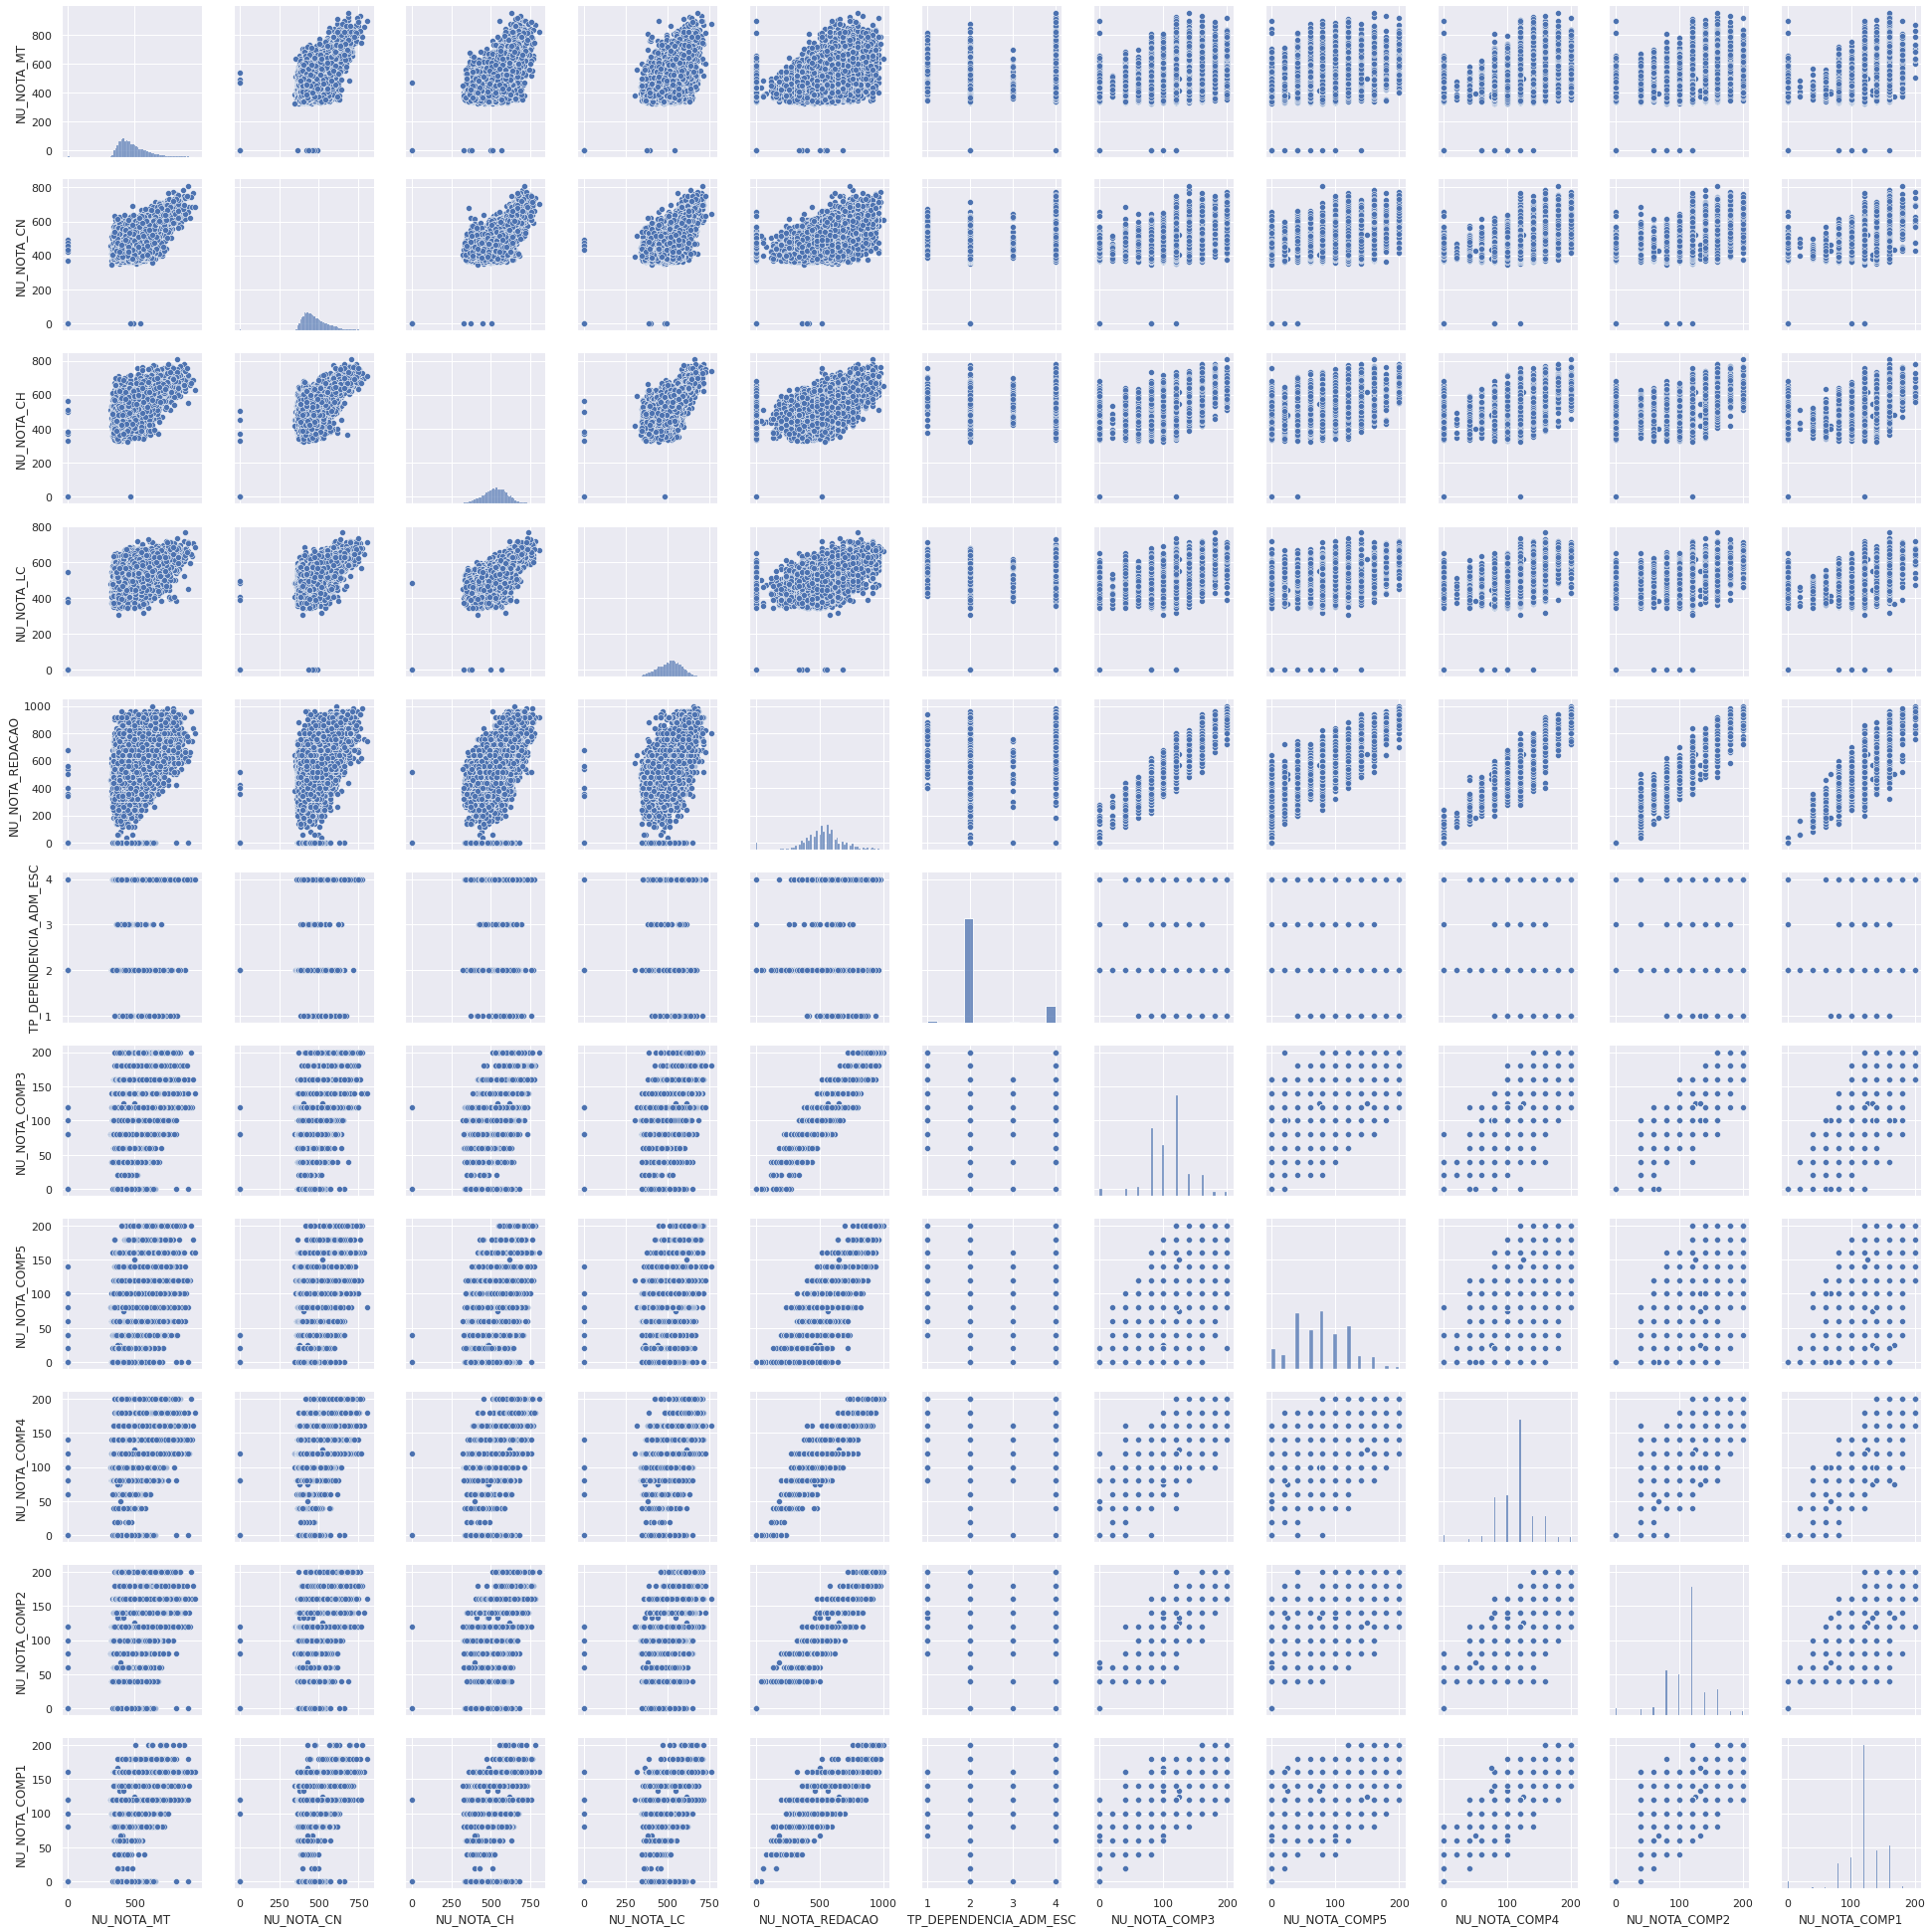

In [51]:
#scatterplot
sns.set()
sns.pairplot(df_train[var], size = 2.5)
plt.show();

Embora já conheçamos algumas das principais figuras, este mega scatter plot nos dá uma ideia razoável sobre as relações das variáveis.

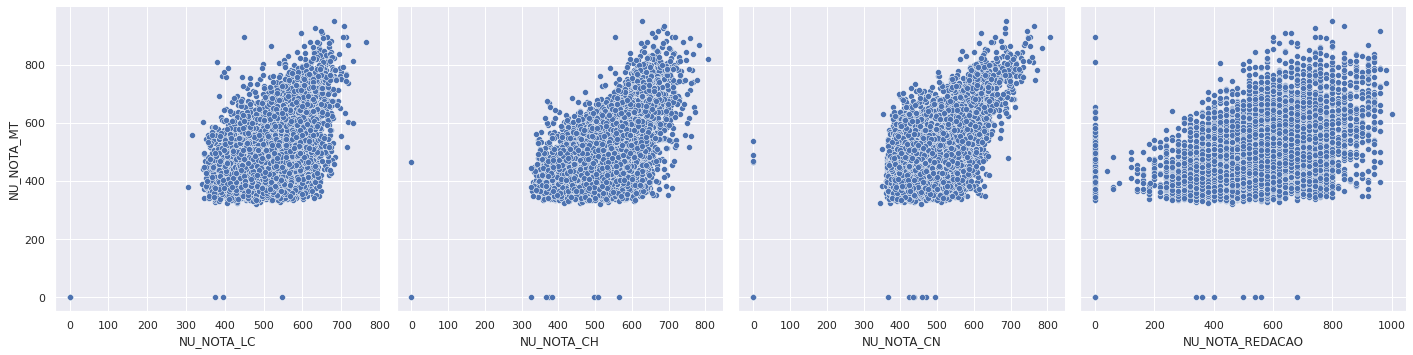

In [52]:
sns.pairplot(
    df_train,
    y_vars=['NU_NOTA_MT'],
    x_vars=[ 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'], size = 5
)

Uma das figuras que podemos achar interessante é essa deste Scatter plot que gerei acima ele mostra a relação da nossa variável 'NU_NOTA_MT' e nossas outras variáveis de 'NU_NOTA_'. Nesta figura podemos ver os pontos desenhando uma linha linear, que quase funciona como uma borda. Faz todo o sentido que a maioria dos pontos fique acima dessa linha pois estamos falando de notas e como estamos falando do ENEM uma prova que a maioria das pessoas estuda muito para isso, nos podemos perceber que não temos notas abaixo da linha, somente as notas zeradas pois ai são pessoas que talvez faltaram ou desistiram da prova.

# **Limpeza dos dados**

Neste capítulo iremos sair um pouco da parte da analise da nossa variável e outras variáveis correlacionadas para começarmos a limpar e tratar os dados para o nosso modelo pois não podemos ter dados nulos ou outliers se não nosso modelo não irá funcionar direito e poderá nos informar dados errados.

Vamos então analisar o nosso total de arquivos nulos e a porcentagem deles que temos nas variáveis que nos interessam e queremos usar pois se a gente fosse tratar todo nosso banco de dados iamos passar talvez um dias tratando ele pois são muitas colunas e teriamos que analisar os dados de diversas formas diferentes para saber como iríamos preencher eles mas vamos deixar de conversa e agora vamos colocar a mão na massa.

In [53]:
total = df_train[var].isnull().sum().sort_values(ascending=False)
percent = (df_train[var].isnull().sum()/df_train[var].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
NU_NOTA_MT,3597,0.261981
NU_NOTA_LC,3597,0.261981
NU_NOTA_REDACAO,3597,0.261981
NU_NOTA_COMP3,3597,0.261981
NU_NOTA_COMP5,3597,0.261981
NU_NOTA_COMP4,3597,0.261981
NU_NOTA_COMP2,3597,0.261981
NU_NOTA_COMP1,3597,0.261981
NU_NOTA_CN,3389,0.246832


Depois de conferirmos podemos ver todas nossas variáveis tem valores nulos, então chegou a hora de prepar os dados para nossa previsão. Primeiro realizei o tratamento imputando o valor 0 (zero) na prova daqueles candidatos que estavam com com status diferente de “1 = Presente na prova” pois se eles não foram na prova então a nota deles é 0 (zero).

In [54]:
df_train.loc[df_train['TP_PRESENCA_CH'] != 1, 'NU_NOTA_CH'] = df_train.loc[df_train['TP_PRESENCA_CH'] != 1, 'NU_NOTA_CH'].fillna(0)
df_train.loc[df_train['TP_PRESENCA_CN'] != 1, 'NU_NOTA_CN'] = df_train.loc[df_train['TP_PRESENCA_CN'] != 1, 'NU_NOTA_CN'].fillna(0)
df_train.loc[df_train['TP_PRESENCA_MT'] != 1, 'NU_NOTA_MT'] = df_train.loc[df_train['TP_PRESENCA_MT'] != 1, 'NU_NOTA_MT'].fillna(0)
df_train.loc[df_train['TP_PRESENCA_LC'] != 1, 'NU_NOTA_LC'] = df_train.loc[df_train['TP_PRESENCA_LC'] != 1, 'NU_NOTA_LC'].fillna(0)
df_train.loc[df_train['TP_PRESENCA_LC'] != 1, 'NU_NOTA_REDACAO'] = df_train.loc[df_train['TP_PRESENCA_LC'] != 1, 'NU_NOTA_REDACAO'].fillna(0)

Pronto agora nós iremos substituir também os valores nulos nas 'NU_NOTA_COMP' por 0 pois acredito que sejam valores nulos por causa das notas nulas em Redação que são devida as presenças.

In [55]:
df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

Vamos agora conferir novamente se os dados que tratamos realmente foram preenchidos e se falta algum valor nulo ainda nas variáveis que tratamos.

In [56]:
total = df_train[var].isnull().sum().sort_values(ascending=False)
percent = (df_train[var].isnull().sum()/df_train[var].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
NU_NOTA_MT,0,0.000000
NU_NOTA_CN,0,0.000000
NU_NOTA_CH,0,0.000000
NU_NOTA_LC,0,0.000000
NU_NOTA_REDACAO,0,0.000000
NU_NOTA_COMP3,0,0.000000
NU_NOTA_COMP5,0,0.000000
NU_NOTA_COMP4,0,0.000000
NU_NOTA_COMP2,0,0.000000


Agora vamos analisar a nossa variável 'TP_DEPENDENCIA_ADM_ESC', eu acho a melhor coisa a se fazer seria não usarmos essa variável pois ela contém 68% dos arquivos nulos mas vamos consultar nosso dicionário primeiro para vermos como ela é preenchida e se podemos usar a Moda, Média ou Mediana, vamos então usar nosso describe() novamente.

'TP_DEPENDENCIA_ADM_ESC' - Dependência administrativa (Escola) 
1. Federal
2. Estadual
3. Municipal
4. Privada

In [57]:
df_train['TP_DEPENDENCIA_ADM_ESC'].describe()

count    4282.000000
mean        2.259692
std         0.698586
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: TP_DEPENDENCIA_ADM_ESC, dtype: float64

Acho que a melhor coisa nesse caso realmente é não usarmos nossa variável 'TP_DEPENDENCIA_ADM_ESC' pois mesmo ela tendo uma boa correlação eu acredito que a maior incidência de Dependência Administrativa (Escola) não seja Estadual, acredito que tenham bastantes Dependências Administrativas Privadas que não estão presentes em nossos dados.

In [58]:
variaveis = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4' ,'NU_NOTA_COMP5'  ]
total = df_train[variaveis].isnull().sum().sort_values(ascending=False)
percent = (df_train[variaveis].isnull().sum()/df_train[variaveis].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
NU_NOTA_CH,0,0.0
NU_NOTA_CN,0,0.0
NU_NOTA_LC,0,0.0
NU_NOTA_CH,0,0.0
NU_NOTA_REDACAO,0,0.0
NU_NOTA_COMP1,0,0.0
NU_NOTA_COMP2,0,0.0
NU_NOTA_COMP3,0,0.0
NU_NOTA_COMP4,0,0.0
NU_NOTA_COMP5,0,0.0


Vamos verificar também a quantidade de notas nulas na nossa base de test pois com certeza temos dados nulos lá também:

In [59]:
total = df_test[variaveis].isnull().sum().sort_values(ascending=False)
percent = (df_test[variaveis].isnull().sum()/df_test[variaveis].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
NU_NOTA_LC,1199,0.262019
NU_NOTA_REDACAO,1199,0.262019
NU_NOTA_COMP1,1199,0.262019
NU_NOTA_COMP2,1199,0.262019
NU_NOTA_COMP3,1199,0.262019
NU_NOTA_COMP4,1199,0.262019
NU_NOTA_COMP5,1199,0.262019
NU_NOTA_CH,1134,0.247815
NU_NOTA_CN,1134,0.247815
NU_NOTA_CH,1134,0.247815


Vamos então também selecionar somente valores diferentes de 0 e não nulos na base de test:



In [60]:
df_test = df_test.loc[
     (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

Vamos verificar se selecionamos a quantidade de notas não nulas e maior que zero da nossa base de Test:


In [61]:
total = df_test[variaveis].isnull().sum().sort_values(ascending=False)
percent = (df_test[variaveis].isnull().sum()/df_test[variaveis].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
NU_NOTA_CH,0,0.0
NU_NOTA_CN,0,0.0
NU_NOTA_LC,0,0.0
NU_NOTA_CH,0,0.0
NU_NOTA_REDACAO,0,0.0
NU_NOTA_COMP1,0,0.0
NU_NOTA_COMP2,0,0.0
NU_NOTA_COMP3,0,0.0
NU_NOTA_COMP4,0,0.0
NU_NOTA_COMP5,0,0.0


#**Machine Learning**

O modelo que usei para fazer a regressão, no caso foi o RandomForestRegressor. Mais informações sobre o modelo e os parâmetros você pode ver na [documentação oficial](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) mas fique tranquilo que durante esse capítulo irei explicar um pouco mais sobre o modelo e os seus parâmetros.

Vamos primeiro atribuir y_train a nossa variável alvo 'NU_NOTA_MT', depois vamos setar x test e x train com as variáveis selecionadas para depois padronizarmos os nossos dados.

In [62]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[variaveis]
x_test = df_test[variaveis]

## **Padronização**

Agora iremos padronizar nossos dados as duas técnicas que mais vejo usar são o MinMaxScaler que o parâmetro feature_range= (0,1) é o default que resultará a normalização variando entre 0 e 1. Lembrando que esses valores podem ser definidos da maneira que for mais conveniente para você caso você mude a escala e também é possível conseguir os valores na escala original usando StandardScaler que eu usarei adiante.

In [63]:
std_scaler = StandardScaler()  

In [64]:
x_train = std_scaler.fit_transform(x_train)  
x_test = std_scaler.transform(x_test)

## **Pipeline**

Antes de prosseguirmos vamos criar nosso pipeline para nos ajudar a compreender nosso modelo melhor depois.

Um pipeline consiste em uma cadeia de elementos de processamento ( processos, threads , corrotinas, funções, etc.), dispostos de forma que a saída de cada elemento seja a entrada do próximo, o nome é por analogia a um pipeline físico. Normalmente, alguma quantidade de buffer é fornecida entre elementos consecutivos. As informações que fluem nesses pipelines geralmente são um fluxo de registros, bytes ou bits , e os elementos de um pipeline podem ser chamados de filtros. Isso também é chamado de padrão de projeto de tubos e filtros. Conectar elementos em um pipeline é análogo à composição de funções. 

Abaixo darei um exemplo de um pipeline que vai nos ajudar mais adiante com as nossas métricas.

In [65]:
def evaluate_model(yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()

##**RandomForestRegressor**

Uma RandomForest é um estimador que ajusta várias árvores de decisão de classificação em várias sub-amostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo. O tamanho da sub-amostra é controlado com o | *max_samples* | parâmetro | *if bootstrap=True* |  (padrão), caso contrário, todo o conjunto de dados é usado para construir cada árvore. Abaixo vou explicar rapidamente cada parâmetro que foi usado.

In [66]:
regressor = RandomForestRegressor( 
           criterion="absolute_error", 
           max_depth=8,
           n_estimators= 500,
           n_jobs=-1,
           random_state=42
           )

1. Criterion - A função para medir a qualidade de uma divisão.

2. Max_depth - A profundidade máxima da árvore.

3. N_estimators - O número de árvores na floresta.

4. N_jobs - O número de jobs a serem executados em paralelo.

5. Random_state - Pega sempre o número aleátorio de amostra que decidirmos, é bom usar para toda vez que carregarmos o nosso modelo termos a mesma amostra e o mesmo resultado.

In [68]:
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=8, n_estimators=500,
                      n_jobs=-1, random_state=42)

In [69]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

Agora depois que fizemos nosso .predict vamos avaliar nosso modelo com o pipeline (Função) que temos acima e com as contidas nele métricas vamos analisar como foi a perfomance do nosso modelo.

R2 Score:  0.9236090445797727
MAE:  40.31023117989803
MSE:  3637.974915982935


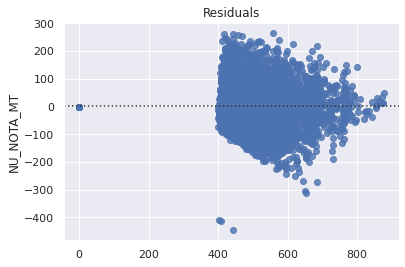

In [70]:
evaluate_model(y_train, y_pred_train)

### **Métricas**

Então, o que seria o 'R2 Score', 'MAE' e 'MSE'? O que são essas métricas destinadas para avaliar modelos de regressão e o que elas representam?

Diante disso, neste texto serão apresentadas algumas métricas que podem ser importantes na hora de avaliar modelos de regressão e como elas podem ser interpretadas principalmente para descrever os seus resultados. As métricas abordadas serão a R², Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE).

**R²**

A métrica R², também conhecida como R-dois ou coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo. Os resultados variam de 0 a 1, geralmente também são expressos em termos percentuais, ou seja, variando entre 0% e 100%. Quanto maior é o valor de R², mais explicativo é o modelo em relação aos dados previstos.

**Erro Médio Absoluto**

O erro médio absoluto (MAE — do inglês Mean Absoluto Error), mede a média da diferença entre o valor real com o predito. Mas por haver valores positivos e negativos, é adicionado um módulo entre a diferença dos valores. Além disso, esta métrica não é afetada por valores discrepantes — os denominados outliers.

O Valor de saída da equação tem a mesma escala dos dados utilizados para previsão, logo fica mais fácil a sua interpretação. Se o valor de MAE resultante for igual a 10,01 m, por exemplo, este resultado significa que o modelo pode estar errando em média 10,01 m para mais quanto para menos em relação ao valor correto. Por isso que para uma previsão futura, este resultado precisa ser levado em consideração para a tomada de decisão. Contudo o quanto este erro representa em relação ao valor real percentualmente?


**Erro Quadrático Médio**

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE. Entretanto, ao invés de usar o módulo do resultado entre o valor de y e ŷ, nesta métrica a diferença é elevada ao quadrado. Desta maneira penalizando valores que sejam muito diferentes entre o previsto e o real. Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.

Apesar de sua ideia poderosa, a métrica MSE apresenta um problema de interpretabilidade. Por haver a elevação ao quadrado, a unidade fica distorcida, em outras palavras, se a unidade medida for metros (m), o resultado será em m². Por isso que uma adaptação da MSE é a RMSE que será apresentada abaixo.

# Submissão

Usando nosso modelo de Random Forest tivemos um ótimo resultado com o R2 marcando 92,3% não tivemos também o MAE muito discrepante então podemos dizer que fizemos um bom modelo analisando as variáveis que tinhamos, pode ser que com outras variáveis o modelo tivesse melhorado ou piorado bastante mas todo teste é bom para tentarmos melhorar o nosso modelo, logo abaixo iremos salvar nosso predict no answer.csv e iremos ver um pouco dos nossos dados.

In [71]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = pd.read_csv("https://raw.githubusercontent.com/Math-Muniz/Codenation/main/test.csv", sep="," , encoding="UTF8")['NU_INSCRICAO']
answer['NU_NOTA_MT'] = pd.Series(y_pred_test)

In [72]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,418.5470
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.5231
2,b38a03232f43b11c9d0788abaf060f7366053b6d,594.9161
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,507.6317
4,715494628a50142ce8cb17191cfe6d0f3cae0934,468.1385


In [73]:
answer.shape

(4576, 2)

In [74]:
answer.to_csv('answer.csv', index=False)